In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My\ Drive/Computer\ Vision/Assignment\ 1

/content/drive/My Drive/Computer Vision/Assignment 1


In [4]:
!ls

Assignment-1.pdf  image_2.png  q1.ipynb  q3.ipynb  q6.ipynb  sharingan.jpg
image_1.jpg	  image_3.png  q2.ipynb  q4.ipynb  q7.ipynb


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [0]:
def salt_pepper_noise(orig_image, level=0.1):
    nimage = np.copy(orig_image)
    num_pixels = np.ceil(level * image.shape[0]*image.shape[1])
    coords = [np.random.randint(0, i - 1, int(num_pixels)) for i in image.shape[:2]]
    white = [coords[0][:int(num_pixels/2)],coords[1][:int(num_pixels/2)]]       
    black = [coords[0][int(num_pixels/2):],coords[1][int(num_pixels/2):]]
    nimage[black]=0
    nimage[white]=255
    return nimage

In [0]:
image = cv2.imread('image_2.png')

([], <a list of 0 Text yticklabel objects>)

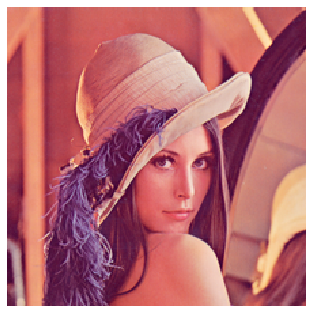

In [8]:
image=image[..., ::-1]
plt.imshow(image)
plt.grid(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

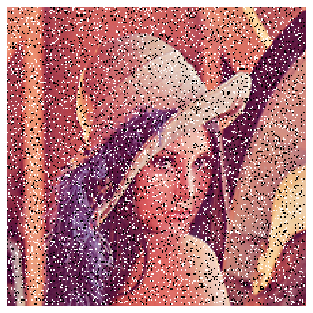

In [17]:
level = 0.2
noisy_image = salt_pepper_noise(image, level = level)
plt.imshow(noisy_image)
plt.grid(False)
plt.xticks([])
plt.yticks([])

In [0]:
filter_size = 11
padding = int((filter_size-1)/2)

In [0]:
padded_image = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding, image.shape[2]))
padded_image[padding: image.shape[0] + padding, padding: image.shape[1] + padding, :] = image

new_image = np.zeros(image.shape)

In [0]:
for channel in range(image.shape[2]):
    for i in range(padding,image.shape[0] + padding):
        for j in range(padding,image.shape[1] + padding):
            vals=[]
            for k in range(i-padding, i+padding+1):
                for l in range(j-padding, j+padding+1):
                    vals.append(padded_image[k][l][channel])
            new_image[i-padding][j-padding][channel] = np.median(vals)

([], <a list of 0 Text yticklabel objects>)

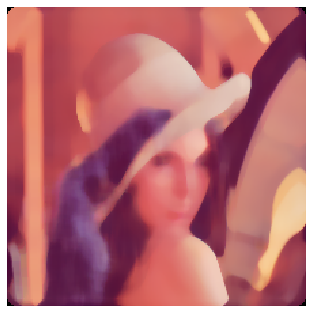

In [21]:
plt.imshow(new_image/255)
plt.grid(False)
plt.xticks([])
plt.yticks([])

In [0]:
median = cv2.medianBlur(image,11)

([], <a list of 0 Text yticklabel objects>)

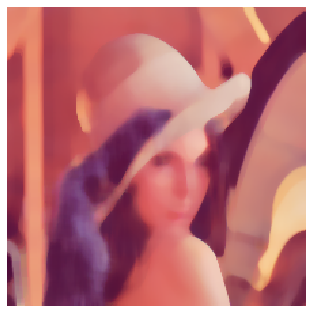

In [23]:
plt.imshow(median)
plt.grid(False)
plt.xticks([])
plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], <a list of 0 Text yticklabel objects>)

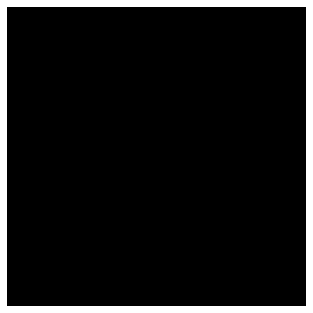

In [24]:
diff = new_image - median
plt.imshow(diff)
plt.grid(False)
plt.xticks([])
plt.yticks([])